### Diabetes Prediction


###**Problem Definition**

A healthcare company wants to check if the patient has diabetes or not based on some diagnostic measurements. 

The task is to build a Machine Learning model that is capable of predicting if a patient has diabetes.
 

###**Dataset Description**

> **DATASET:** *Pima Indians Diabetes.csv*


The dataset was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (a subgroup of Native Americans) and are females of ages 21 and above.


The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

###Importing the libraries


In [1]:
#data analysis
import pandas as pd
import numpy as np

#machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### **Collecting the Dataset**

In [3]:
data=pd.read_csv(r"C:\Users\Mouli\Downloads\Dataset\diabetes.csv",index_col=False)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,No
1,8,183,64,0,0,23.3,0.672,32,Yes
2,1,89,66,23,94,28.1,0.167,21,No
3,0,137,40,35,168,43.1,2.288,33,Yes
4,5,116,74,0,0,25.6,0.201,30,No


##**Analyzing and Preparing the data**




In [4]:
print(data.shape) # Checking the number of rows and columns in the dataframe

(767, 9)


In [5]:
print(data.columns.values) # Checking different features/attributes present in the dataset

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [6]:
print(data['Outcome'].unique()) # Checking unique values in the column 'Outcome'

['No' 'Yes']


In [7]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object


* The dataset is having 767 instances and 9 features.
*   Categorical features: Outcome(with 2 unique values as Yes and No)
*   Numerical features: Pregnancies, Glucose, BloodPressure, SkinThickness,  Insulin, BMI,	DiabetesPedigreeFunction,	Age, Outcome

In [8]:
print(data.isnull().sum()) # Checking the null values in all the columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<div style="text-align: justify"> None of the features contain null values.

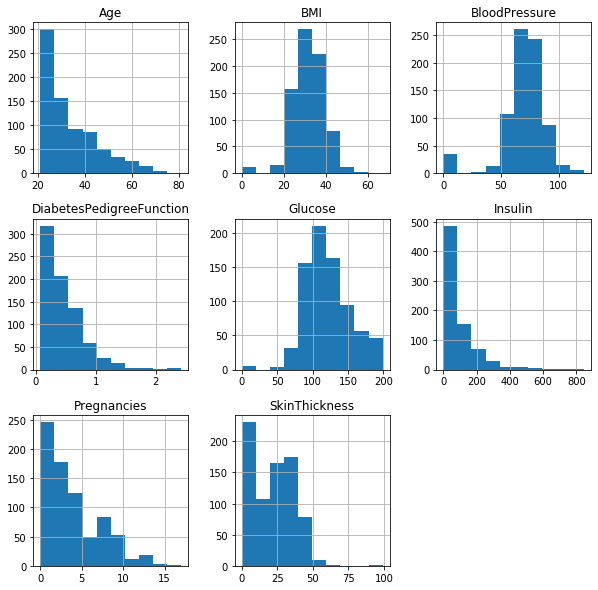

In [9]:
data.hist(figsize=(10,10))
plt.show()

Some features seems to have wrong values(0), which can be seen from the histogram plots. Number of Pregnancies can be 0 but other features like Glucose, Blood pressure, Skin Thiness, Insulin and BMI can't be 0.

In [10]:
print(data.eq(0).sum()) # Finding the number of '0'values in each column

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Median is used to replace zerores in the features. But in the case of insulin there are too many null values, so it would be better to drop that feature.

In [11]:
data['Glucose'].replace(to_replace=0,value=data['Glucose'].median(),inplace=True)
data['BloodPressure'].replace(to_replace=0,value=data['BloodPressure'].median(),inplace=True)
data['SkinThickness'].replace(to_replace=0,value=data['SkinThickness'].median(),inplace=True)
data['BMI'].replace(to_replace=0,value=data['BMI'].median(),inplace=True)
data.drop(['Insulin'],axis=1,inplace=True)

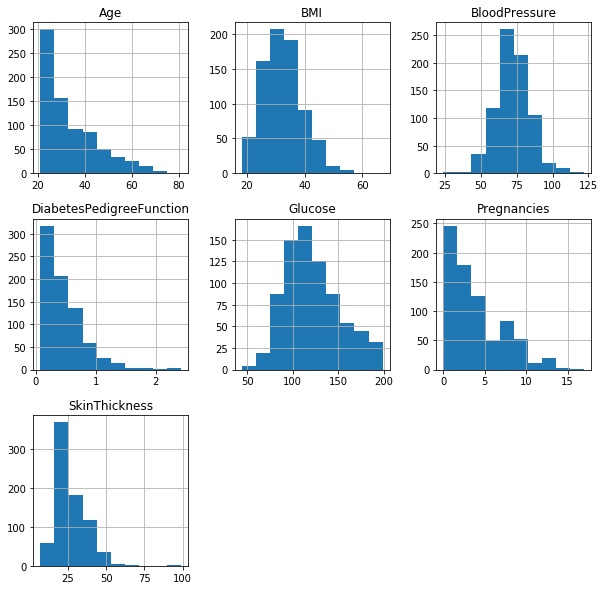

In [12]:
data.hist(figsize=(10,10))
plt.show()

Now it can be seen that none of the features contain 0 value except Pregnancies

##Spread of the data.

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.621904,72.387223,27.324641,32.449413,0.471674,33.219035
std,3.370877,30.443252,12.104527,9.230877,6.879727,0.331497,11.752296
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,23.000000,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,36.600000,0.625000,41.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000


It seems some features are having outlier values, like no. of pregnancies is going as high as 17 where as the median('50%') is 3 and maximum age is 81 as compared to median 29.These high values might be outliers.

Visualizing the data using box plot which gives an idea about the spread of data and the outliers. 

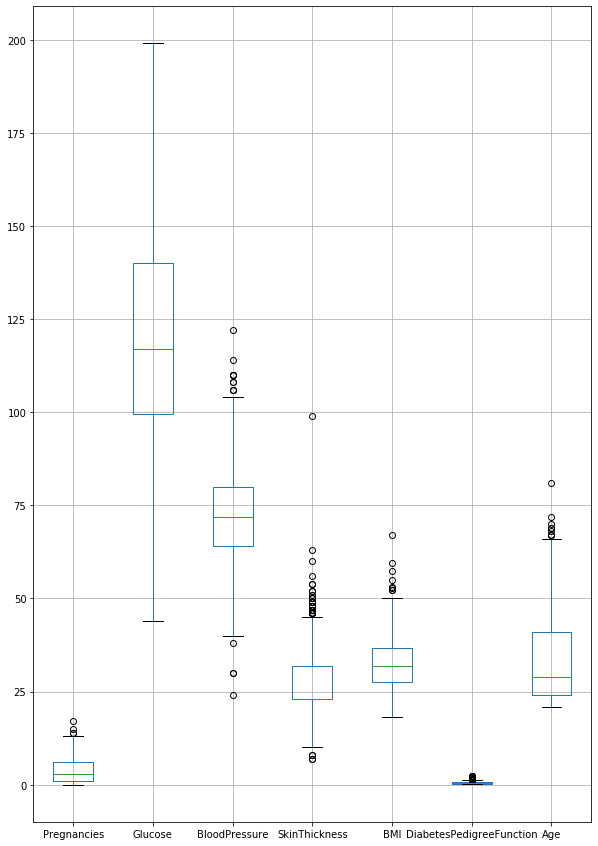

In [14]:
data.boxplot(figsize=(10,15))
plt.show()

It has been observed that Pregnancies, BloodPressure, SkinThickness, BMI and Age are having several outliers.

### Normal Distribution Curve - Before Removing Outliers



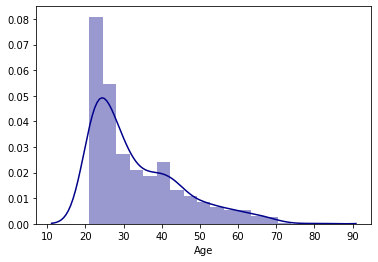

In [15]:
sns.distplot(data['Age'], hist=True, kde=True, color = 'darkblue')

From the above plot it can be seen that there are very less number of samples having age 70 to 80. They seem to be outlier values.

In [16]:
for col in ['Pregnancies','BloodPressure','SkinThickness', 'BMI','Age']:
    percentiles = data[col].quantile([0.01,0.99]).values #Filtering 1%(0-1), 1%(99-100) extreme outlier data
    data[col] = np.clip(data[col], percentiles[0], percentiles[1])

In [17]:
data.shape

(767, 8)

The outliers have been clipped using the numpy's clip function.Now the data contains the values which are in percentile range of 1 to 99

###Normal distribution curve after removing outlier

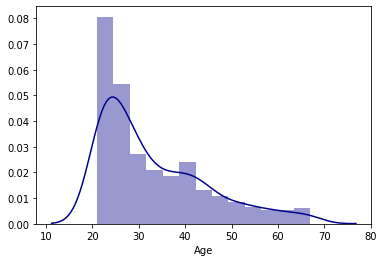

In [18]:
sns.distplot(data['Age'], hist=True, kde=True, color = 'darkblue')

In the above plot it can be seen that outliers are capped with 1 to 99 percentile values.

In [19]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.831812,121.621904,72.410691,27.234316,32.400464,0.471674,33.183833
std,3.338067,30.443252,11.709697,8.743843,6.671910,0.331497,11.637086
min,0.000000,44.000000,44.000000,10.000000,19.500000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,23.000000,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,36.600000,0.625000,41.000000
max,13.000000,199.000000,106.000000,51.340000,50.782000,2.420000,67.000000


###Converting Categorical feature to Numerical values. 

Label Encoding is used for this purpose, Label Encoding encodes the label with values 0 to (no_of_classes-1).

In [20]:
le=LabelEncoder()
data['Outcome']=le.fit_transform(data['Outcome'])

In [21]:
data.head() #Encoded values

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29.0,26.6,0.351,31,0
1,8,183,64,23.0,23.3,0.672,32,1
2,1,89,66,23.0,28.1,0.167,21,0
3,0,137,44,35.0,43.1,2.288,33,1
4,5,116,74,23.0,25.6,0.201,30,0


Now, the **No** from 'Outcome' column has been replaced with **0** and **Yes** has been replaced with **1**

Let us split the data for training and testing  **train_test_split** method from sklearn.model_selection.

In [22]:
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:-1],data.iloc[:,-1],test_size=0.20,random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(613, 7)
(154, 7)
(613,)
(154,)


##Feature Selection

In [23]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125937,0.211313,0.039694,0.025192,-0.034762,0.549266,0.218981
Glucose,0.125937,1.000000,0.219989,0.159246,0.233282,0.136884,0.267494,0.492079
BloodPressure,0.211313,0.219989,1.000000,0.161918,0.290596,0.001085,0.333838,0.170113
SkinThickness,0.039694,0.159246,0.161918,1.000000,0.561981,0.137595,0.042026,0.186819
BMI,0.025192,0.233282,0.290596,0.561981,1.000000,0.147735,0.033894,0.312978
DiabetesPedigreeFunction,-0.034762,0.136884,0.001085,0.137595,0.147735,1.000000,0.032789,0.173245
Age,0.549266,0.267494,0.333838,0.042026,0.033894,0.032789,1.000000,0.240264
Outcome,0.218981,0.492079,0.170113,0.186819,0.312978,0.173245,0.240264,1.000000


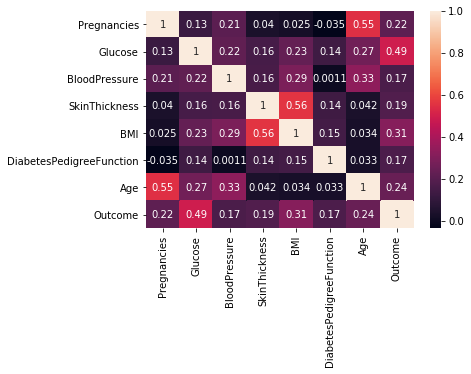

In [24]:
sns.heatmap(correlation, annot = True)


From the above heatmap, it can be easily interpreted that patients with high **Pregnancies, Glucose, BMI and Age** do have more chances of being diabetic, as they have high correlation with the target variable.

Also, if 2 independent features show high correlation, we can just keep one of them as both are revealing same type of information. In the above heatmap Age and Pregnancies are showing high correlation. Hence, Age column is used and left the Pregnancies column.

In [25]:
X_train= X_train[['Glucose','BMI','Age']]
X_test= X_test[['Glucose','BMI','Age']]

##Feature Scaling

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaler.fit(X_test)
scaled_X_test=scaler.transform(X_test)

Features has been scaled to normalise them in a certain range using StandadScaler from sklearn.preprocessing. StandardScaler transforms all the features to have values with mean=0 and variance=1

##Selecting the model using cross validation

In [27]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))

acc=[]
nam=[]

for name,model in models:
  kfold=KFold(n_splits=10,random_state=7) 
  cross_val_sc=cross_val_score(model,scaled_X_train,y_train,scoring='accuracy',cv=kfold)
  print('{} : accuracy:{}( standard deviation:{})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))
  acc.append(cross_val_sc.mean()*100)
  nam.append(name)


lr : accuracy:0.760074034902168( standard deviation:0.06953974499959363)
decision tree : accuracy:0.6687466948704388( standard deviation:0.046786411029841754)
svm : accuracy:0.7650449497620307( standard deviation:0.062338431979468846)
knn : accuracy:0.7029878371232152( standard deviation:0.0716984235327592)
naive bayes : accuracy:0.7748281332628238( standard deviation:0.06268513430723137)
Random Forest : accuracy:0.7128503437334743( standard deviation:0.05105448514297434)


Let us visualize the accuracy,
We can be seen from the bar plot, logistic regression is giving quite good accuracy.

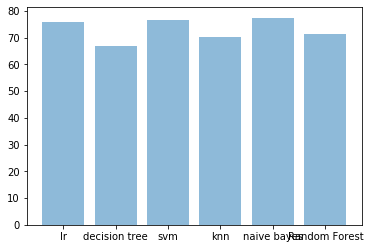

In [28]:
height=np.arange(0,101,5)
plt.bar(np.arange(len(nam)),acc,align='center',alpha=0.5)
plt.xticks(np.arange(len(nam)),nam)
plt.show()

##Creating the model using logistic regression. 

In [29]:
model= LogisticRegression()
model.fit(scaled_X_train,y_train)
y_pred=model.predict(scaled_X_test)

##**Model Performance**

To check how the model is working on the test data, confusion matrix has been used.

In [30]:
confusion_matrix(y_test,y_pred)

array([[89, 15],
       [22, 28]], dtype=int64)

Values in the confusion matrix denotes:

* 89: **True Positive:** patients who were diabetic are predicted as diabetic

* 15: **False positive:** patients who were not diabetic are predicted as diabetic

* 21: **False negative:** patients who were not diabetic are predicted as not diabetic

* 29: **True negative:** patients who were not diabetic and also predicted as non-diabetic 


## Ensemble Method

 XgBoost classifier

In [31]:
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(scaled_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
from sklearn import metrics #Checking the model accuracy

xgb_pred = xgb_model.predict(scaled_X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7857142857142857


##**Model Performance**

To check how the model is working on the test data, confusion matrix has been used.

In [33]:
confusion_matrix(y_test, xgb_pred)

array([[84, 20],
       [13, 37]], dtype=int64)

#Values in the confusion matrix denotes:

* 84: **True Positive:** patients who were diabetic are predicted as diabetic

* 20: **False positive:** patients who were not diabetic are predicted as diabetic

* 13: **False negative:** patients who were not diabetic are predicted as not diabetic

* 37: **True negative:** patients who were not diabetic and also predicted as non-diabetic 